In [1]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from Solver import chebyshev_shifted, plot_graphics, print_table, solve_examples

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [3]:
def example_5_problem():
    """
    Example 5: y(t) = e^t + e^-((t+1)/3) - 1 + 1/3 * integral
    Exact solution: y(t) = e^t
    """
    def nonlinear_function(cos_t, s_j_tensor, y_s):
        return (cos_t/cos_t)*((s_j_tensor * np.exp(1)) / (y_s)**(1/3))

    def exact_solution(t):
        return np.exp(t)
    return nonlinear_function, exact_solution



def cheb5(t_array):
    is_scalar = np.isscalar(t_array)
    t = np.atleast_1d(t_array)
    results = np.zeros_like(t)
    for i, t_val in enumerate(t):
        T0 = chebyshev_shifted(t_val, 0)
        T1 = chebyshev_shifted(t_val, 1)
        T2 = chebyshev_shifted(t_val, 2)
        T3 = chebyshev_shifted(t_val, 3)
        T4 = chebyshev_shifted(t_val, 4)
        T5 = chebyshev_shifted(t_val, 5)
        T6 = chebyshev_shifted(t_val, 6)
        T7 = chebyshev_shifted(t_val, 7)
        T8 = chebyshev_shifted(t_val, 8)
        T9 = chebyshev_shifted(t_val, 9)
        denominator = (8.52370284e-1*T0 - 1.41570717e-1*T1 + 5.89196519e-3*T2 - 1.63627814e-4*T3 + 3.40654779e-6*T4)**3
        results[i] = 1.0 / denominator
    return results[0] if is_scalar else results


--- Solving Example 5 ---


Loss = 4.8130419826e-07: 100%|██████████| 1000/1000 [05:28<00:00,  3.05it/s]


Starting L-BFGS optimization...
Training completed in 328.66 seconds
Final Loss: 4.8015537468e-07


Using features ['x0']
Compiling Julia backend...
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           76     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80155D-07    |proj g|=  6.54558D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   76      0      1      0     0     0   6.546D-08   4.802D-07
  F =   4.8015537468473782E-007

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


[ Info: Started!



Expressions evaluated per second: 5.760e+04
Progress: 536 / 800 total iterations (67.000%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.532e+00  3.604e+01  y = x0
2           2.124e-19  3.604e+01  y = exp(x0)
5           3.304e-21  1.388e+00  y = exp(x0) * 1
8           3.280e-21  2.442e-03  y = (exp(x0) * 1) + -1.7768e-11
9           2.990e-21  9.259e-02  y = ((x0 + exp(x0)) * 1) - x0
10          1.597e-21  6.269e-01  y = exp(x0) + ((x0 * 4.7341e-10) - -2.0125e-10)
14          9.368e-22  1.334e-01  y = exp((x0 - (((x0 * x0) - x0) * 2.498e-10)) - -2.1395e-1...
                                      0)
17          6.698e-22  1.119e-01  y = exp((x0 - ((((x0 * x0) - x0) - -0.041844) * 3.4555e-10...
                                      )) - -2.1395e-10)
20          5.495e-22  6.5

[ Info: Final population:
[ Info: Results saved to:



Symbolic Approximation:
y(t) = e^{x_{0} - \left(1.6026286751970173 - \left(x_{0} + x_{0}\right)\right) \left(-2.6187922942022747 \cdot 10^{-10}\right) e^{- x_{0} - 0.18253743000660108} \left(x_{0} x_{0} + x_{0} - 0.3649841740462481\right) - -2.6187922942022747 \cdot 10^{-10}}


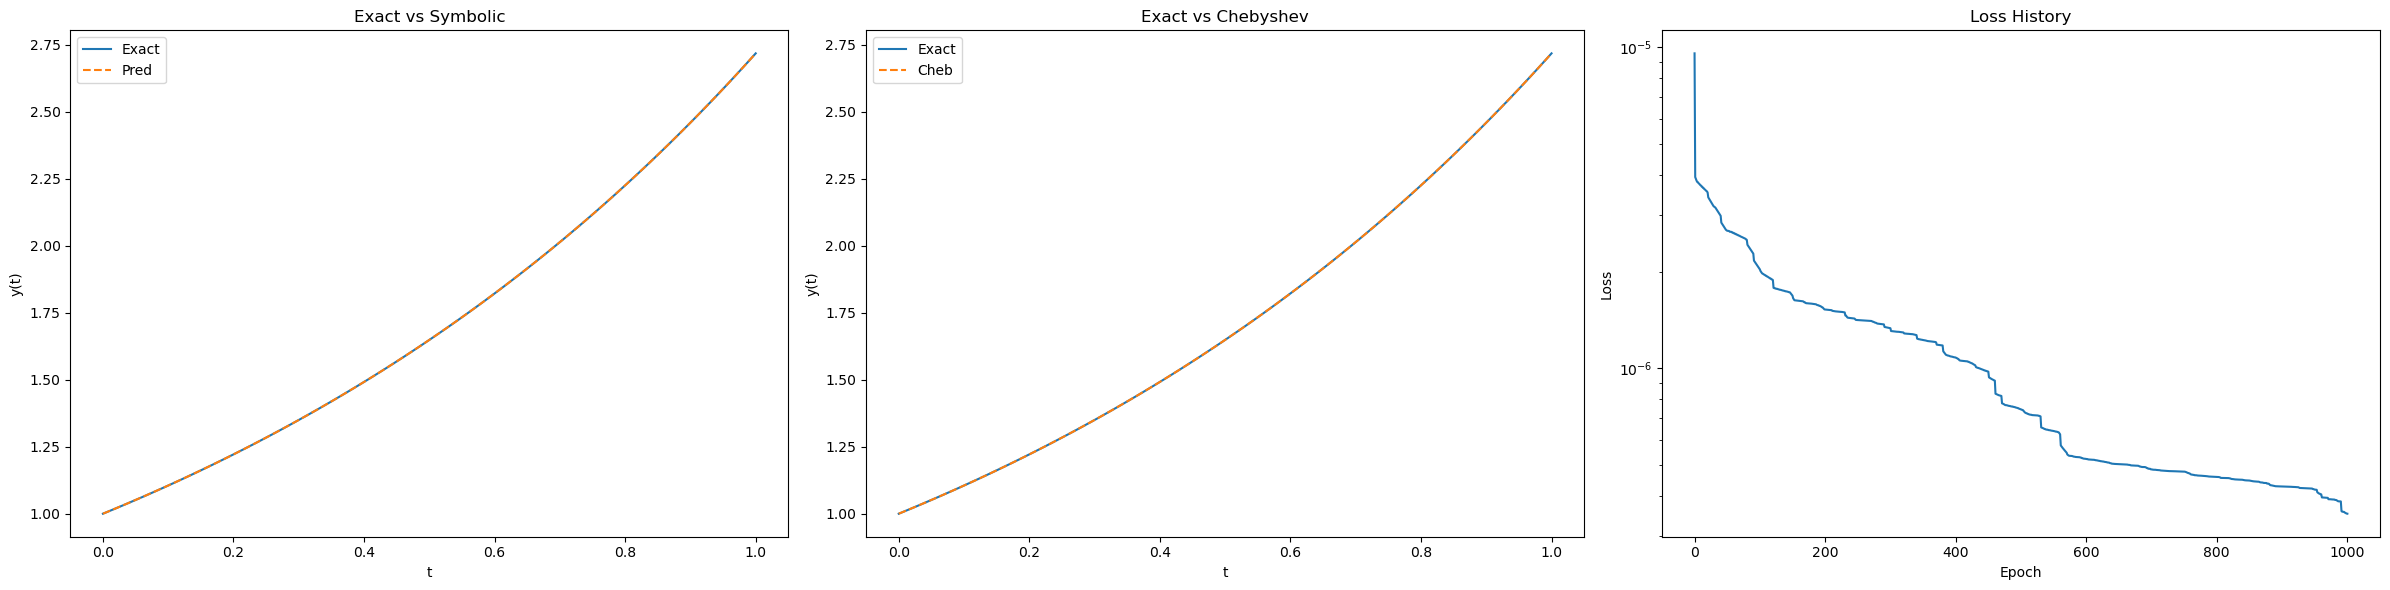

----------------------------------------------------------------------------------------------------------------------------------------------------------------------
|t	 |Exact				 |Symbolic			 |Sym Abs err			 |Chebyshev			|Cheb Abs err		 |Win|
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
|0.0	 |1.00000000000000000000 	 |1.00000000013425505152 	 |0.00000000013425505152	 |0.99999999834462949266 	|0.00000000165537050734	 |Yes|
|0.1	 |1.10628781633139361418 	 |1.10628781654355679009 	 |0.00000000021216317592	 |1.10517078788577838289 	|0.00111702844561523129	 |Yes|
|0.2	 |1.22387273256328321658 	 |1.22387273285184572380 	 |0.00000000028856250722	 |1.22140295055345604602 	|0.00246978200982717055	 |Yes|
|0.3	 |1.35395549277497040386 	 |1.35395549313603869024 	 |0.00000000036106828638	 |1.34985927478861644779 	|0.00409621798635395606	 |Yes|
|0.4	 |1.49786446551191798626 	

In [5]:
res = solve_examples(example_5_problem, idx="5", num_operator=["exp"])
plot_graphics(res, 5, cheb5)
print_table(cheb5, res, 5)

$$y(t) = e^{t - \left(1.60262867519 - \left(2t \right)\right) \left(-2.61879229420 \cdot 10^{-10}\right) e^{-t - 0.182537430006} \left(t^3 - 0.36498417404\right) - 2.61879229420 \cdot 10^{-10}}$$